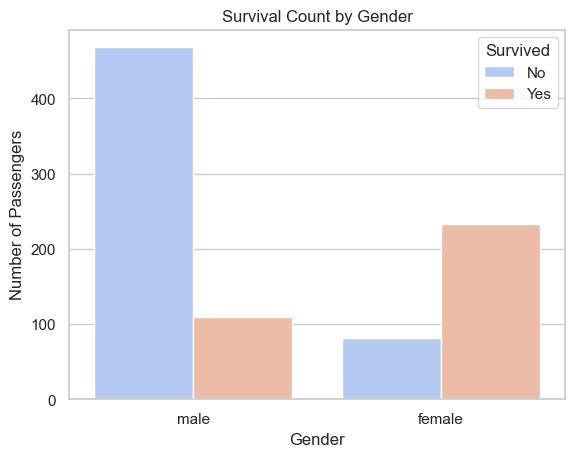

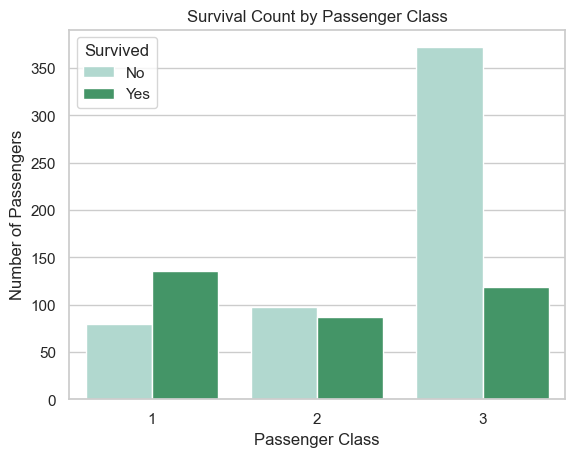

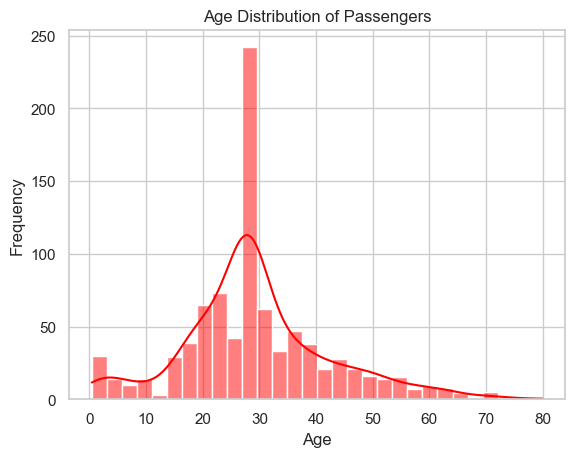

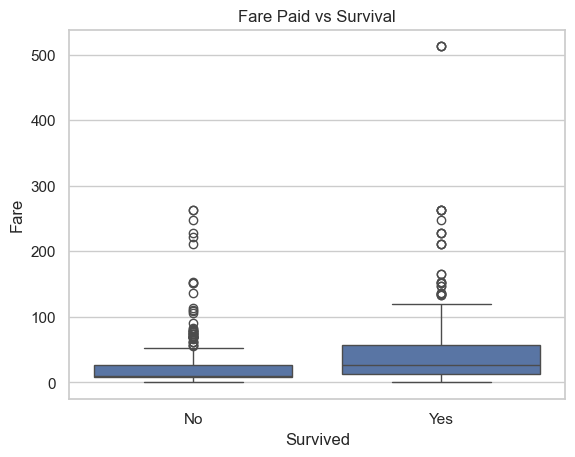

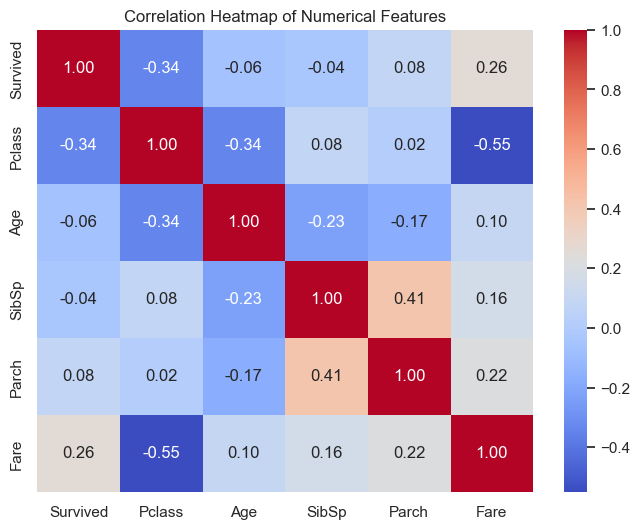


Chi-Square Test between Pclass and Survival
Chi2 Statistic: 102.88898875696056
P-value: 4.549251711298793e-23

Z-test for Survival between Genders
Z-statistic: 16.218833930670097
P-value: 3.7117477701134797e-59


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np

import os
import warnings
warnings.filterwarnings("ignore")
df = pd.read_csv(r"C:\Users\HP\Downloads\titanic\test.csv", encoding='latin1')
df = pd.read_csv(r"C:\Users\HP\Downloads\titanic\gender_submission.csv", encoding='latin1')
df = pd.read_csv(r"C:\Users\HP\Downloads\titanic\train.csv", encoding='latin1')

if 'Age' in df.columns:
    df['Age']= df['Age'].fillna(df['Age'].median())

if 'Embarked' in df.columns:
    df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode()[0])

if 'Cabin' in df.columns:
        df.drop('Cabin', axis=1, inplace=True)

sns.set(style="whitegrid")

sns.countplot(data=df, x='Sex', hue='Survived', palette='coolwarm')
plt.title("Survival Count by Gender")
plt.xlabel("Gender")
plt.ylabel("Number of Passengers")
plt.legend(title="Survived", labels=['No', 'Yes'])
plt.show()

sns.countplot(data=df, x='Pclass', hue='Survived', palette='BuGn')
plt.title("Survival Count by Passenger Class")
plt.xlabel("Passenger Class")
plt.ylabel("Number of Passengers")
plt.legend(title="Survived", labels=['No', 'Yes'])
plt.show()

sns.histplot(data=df, x='Age', bins=30, kde=True, color='red')
plt.title("Age Distribution of Passengers")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

sns.boxplot(data=df, x='Survived', y='Fare')
plt.title("Fare Paid vs Survival")
plt.xlabel("Survived")
plt.ylabel("Fare")
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

numeric_features=['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
plt.figure(figsize=(8,6))
sns.heatmap(df[numeric_features].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

contingency_table=pd.crosstab(df['Pclass'], df['Survived'])
chi2, chi_pval, dof, expwcted=stats.chi2_contingency(contingency_table)
print("\nChi-Square Test between Pclass and Survival")
print("Chi2 Statistic:", chi2)
print("P-value:", chi_pval)

from statsmodels.stats.proportion import proportions_ztest

survived_female=df[(df['Sex']=='female')&(df['Survived']==1)].shape[0]
total_female=df[df['Sex']=='female'].shape[0]
survived_male=df[(df['Sex']=='male')&(df['Survived']==1)].shape[0]
total_male=df[df['Sex']=='male'].shape[0]

count=np.array([survived_female,survived_male])
nobs=np.array([total_female,total_male])
z_stat,z_pval=proportions_ztest(count,nobs)
print("\nZ-test for Survival between Genders")
print("Z-statistic:",z_stat)
print("P-value:",z_pval)